<a href="https://colab.research.google.com/github/luisfelip80/titanic/blob/main/Projeto_SI_%7C_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de Sistemas Inteligentes
> Sobrevivência no Titanic

##### Para começar, faremos a importação dos módulos a serem utilizados para o projeto e mostraremos também a base de dados:

In [180]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# Load data and store it into pandas DataFrame objects
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [183]:
df = df[['Pclass', 'Sex','Age', 'SibSp', 'Parch','Fare', 'Survived']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df = df.dropna()

x = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

(0.0, 80.0)

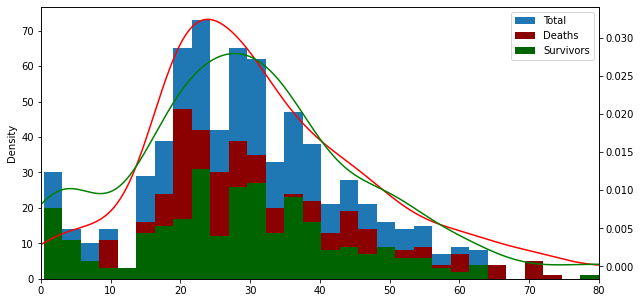

In [184]:
import matplotlib.pyplot as plt

df_aux = pd.DataFrame({'Total': df['Age'],
                       'Deaths': df[df['Survived'] == 0]['Age'],
                       'Survivors':df[df['Survived'] == 1]['Age']},
                      columns=['Total', 'Deaths', 'Survivors'])

plt.figure()
ax = plt.subplot(111)
df_aux.plot.hist(bins=30, figsize=(10, 5), ax=ax, color=('tab:blue', 'darkred', 'darkgreen'))
df_aux['Deaths'].plot(kind='kde', secondary_y=True, color='r')
df_aux['Survivors'].plot(kind='kde', secondary_y=True, color='g')
ax.set_xlim(0, 80)

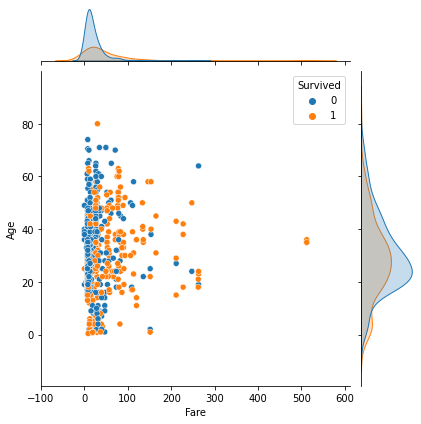

In [185]:
import seaborn as sns

sns.jointplot(data=df, x='Fare', y='Age', hue='Survived')

Alguns detalhes interessantes sobre as correlações:
* A quantidade de SibSp tem uma correlação alta com Parch; isso aparentemente indica que haviam algumas famílias a bordo.

* A taxa que alguns pagaram tem uma certa correlação; aparentemente quem pagou mais teve mais chances de sobreviver, por estar em uma posição mais privilegiada para acessar os botes salva vidas.

* O sexo influenciou muito na quantidade de sobreviventes; aparentemente mais mulheres sobreviveram

É possível notar que a distribuição de sobreviventes com relação ao valor pago está bem desbalanceada. A curva se estende até o passageiro que pagou o maior valor.

In [186]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

from subprocess import call

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

In [188]:
predicted = tree.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, predicted)

0.8324022346368715

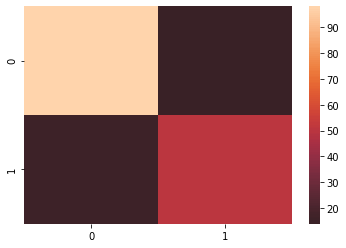

In [189]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [190]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

Predicted Not Survival  Predicted Survival
True Not Survival                      98                  14
True Survival                          16                  51

In [191]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.78      0.76      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [192]:
df.var()

Pclass         0.702663
Sex            0.232247
Age          211.019125
SibSp          0.864497
Parch          0.728103
Fare        2800.413100
Survived       0.241533
dtype: float64

In [193]:
df.corr()

Pclass       Sex       Age     SibSp     Parch      Fare  Survived
Pclass    1.000000 -0.155460 -0.369226  0.067247  0.025683 -0.554182 -0.359653
Sex      -0.155460  1.000000 -0.093254  0.103950  0.246972  0.184994  0.538826
Age      -0.369226 -0.093254  1.000000 -0.308247 -0.189119  0.096067 -0.077221
SibSp     0.067247  0.103950 -0.308247  1.000000  0.383820  0.138329 -0.017358
Parch     0.025683  0.246972 -0.189119  0.383820  1.000000  0.205119  0.093317
Fare     -0.554182  0.184994  0.096067  0.138329  0.205119  1.000000  0.268189
Survived -0.359653  0.538826 -0.077221 -0.017358  0.093317  0.268189  1.000000

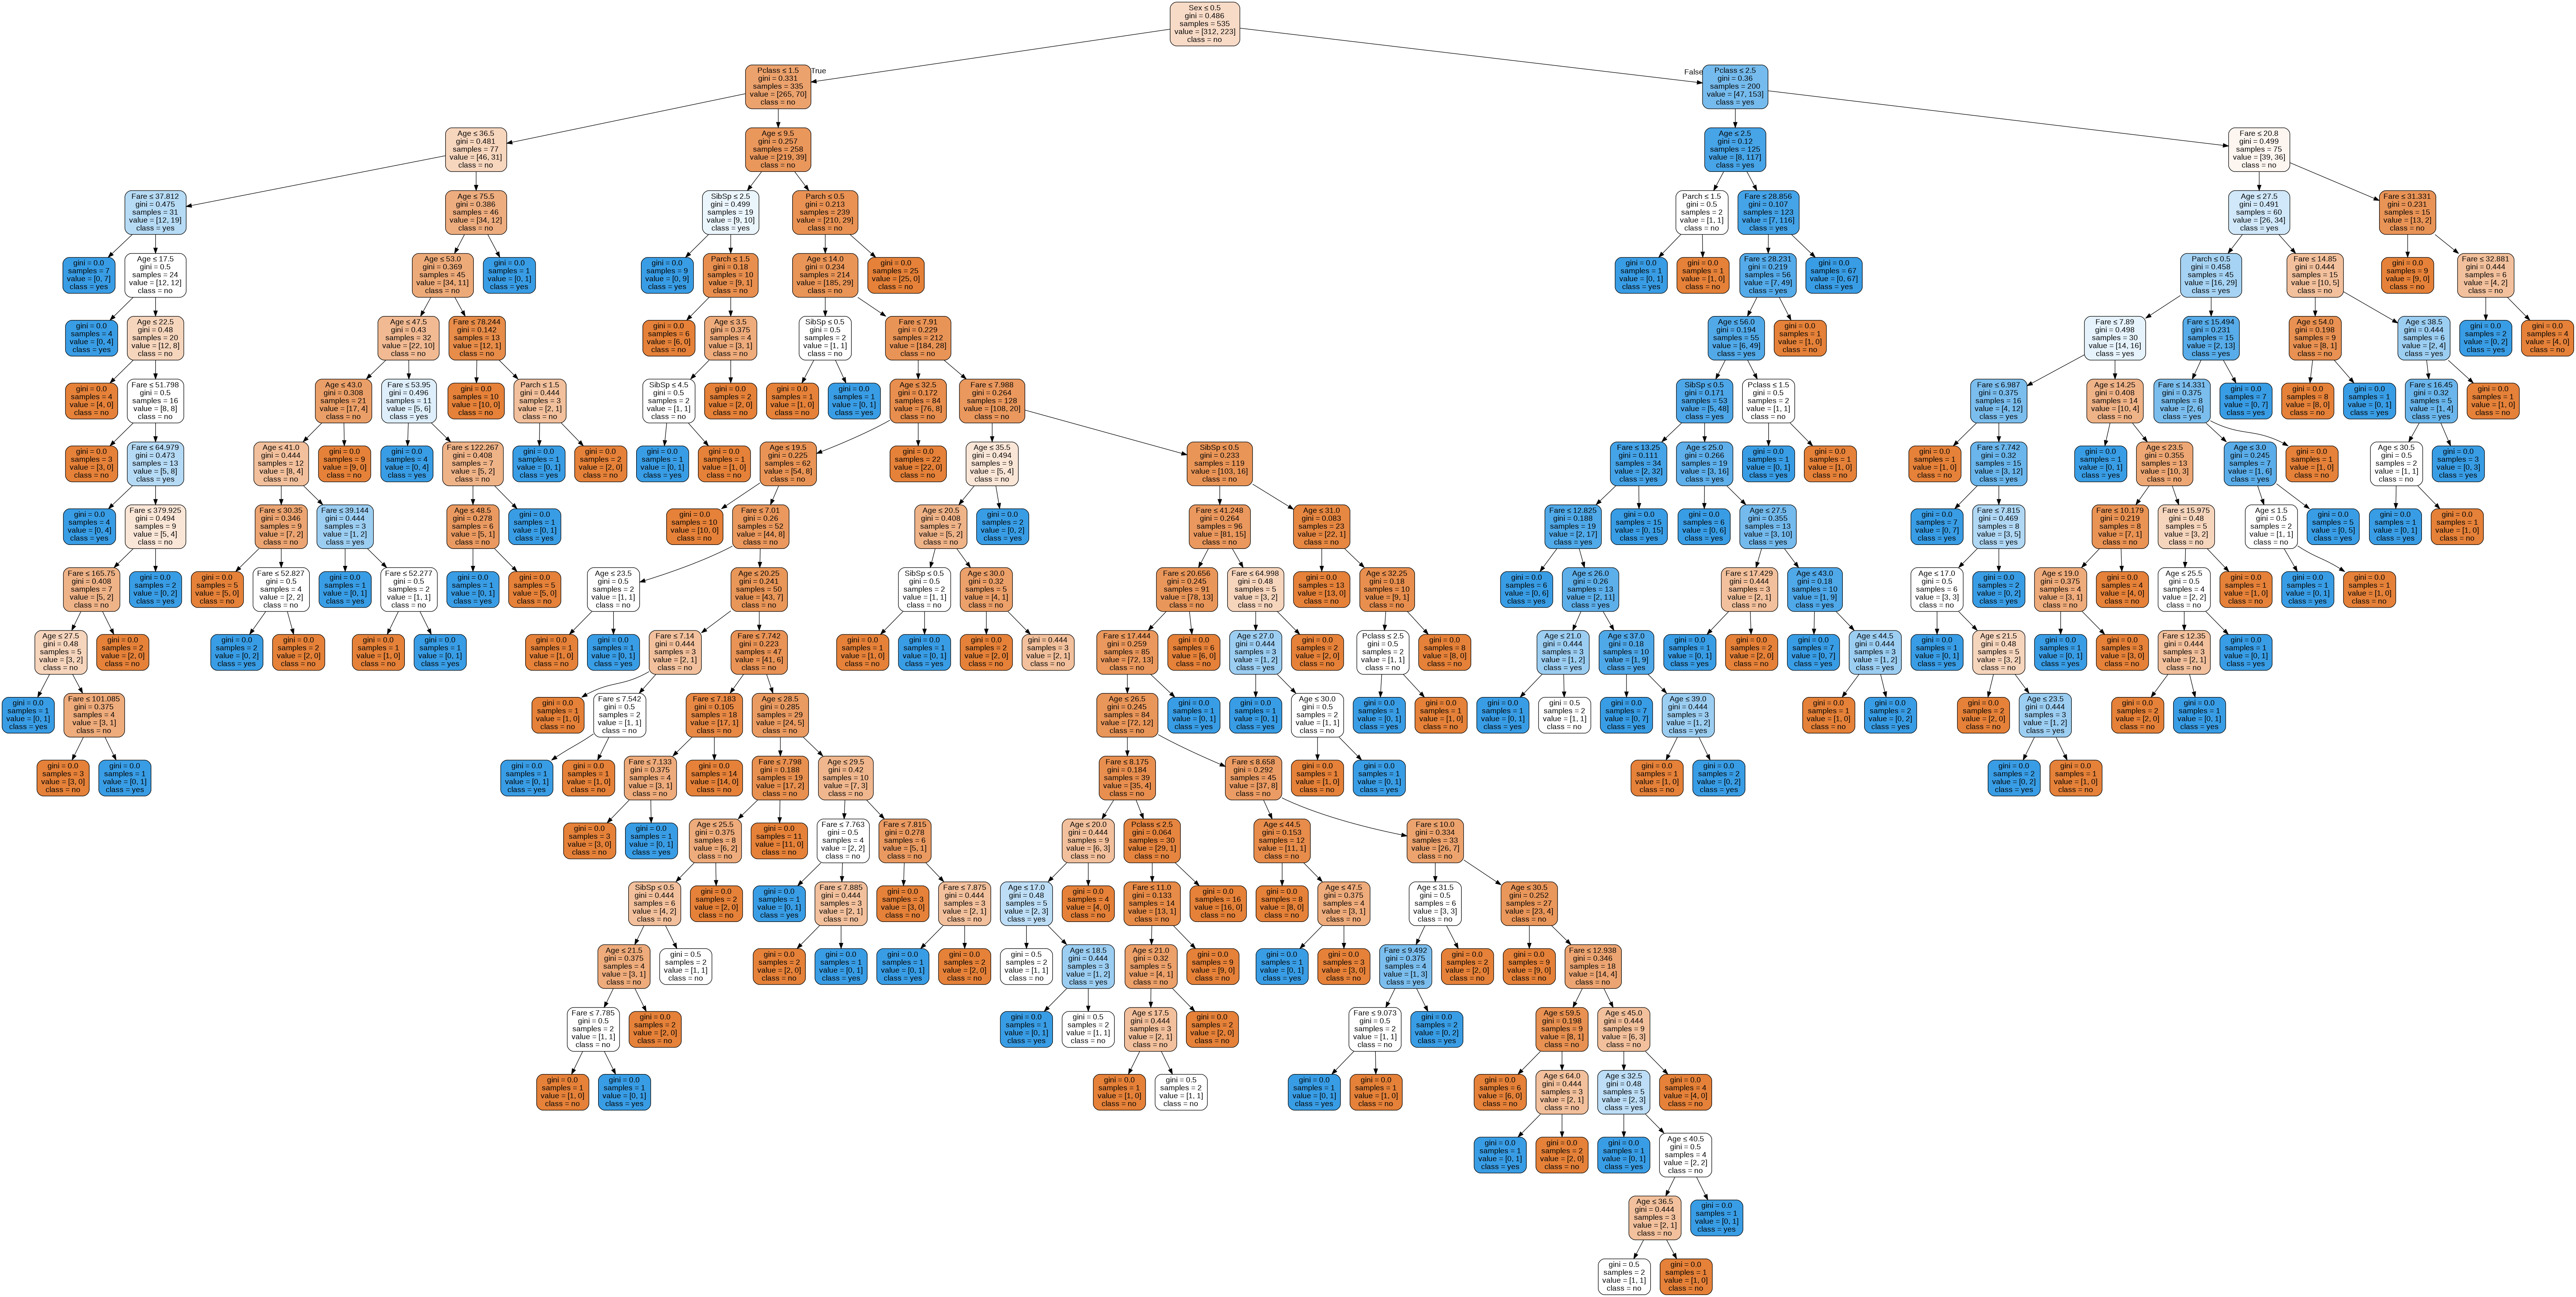

In [194]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

target_names = np.unique(y.map({0:'no', 1:'yes'}))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = list(x.columns),class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Train_test_tree.png')
Image(graph.create_png())

In [195]:
tree = DecisionTreeClassifier(random_state = 1,splitter='best', max_depth=6)
tree.fit(x_train, y_train)
predicted = tree.predict(x_test)
val = accuracy_score(y_test, predicted)


In [196]:
val

0.8603351955307262

In [197]:
target_names = np.unique(y)
columns = df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

In [198]:
predicted = tree.predict(x_test)
accuracy_score(y_test, predicted)

0.8603351955307262

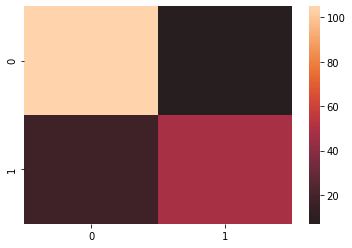

In [199]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [200]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

Predicted Not Survival  Predicted Survival
True Not Survival                     105                   7
True Survival                          18                  49

In [201]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       112
           1       0.88      0.73      0.80        67

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.85       179
weighted avg       0.86      0.86      0.86       179



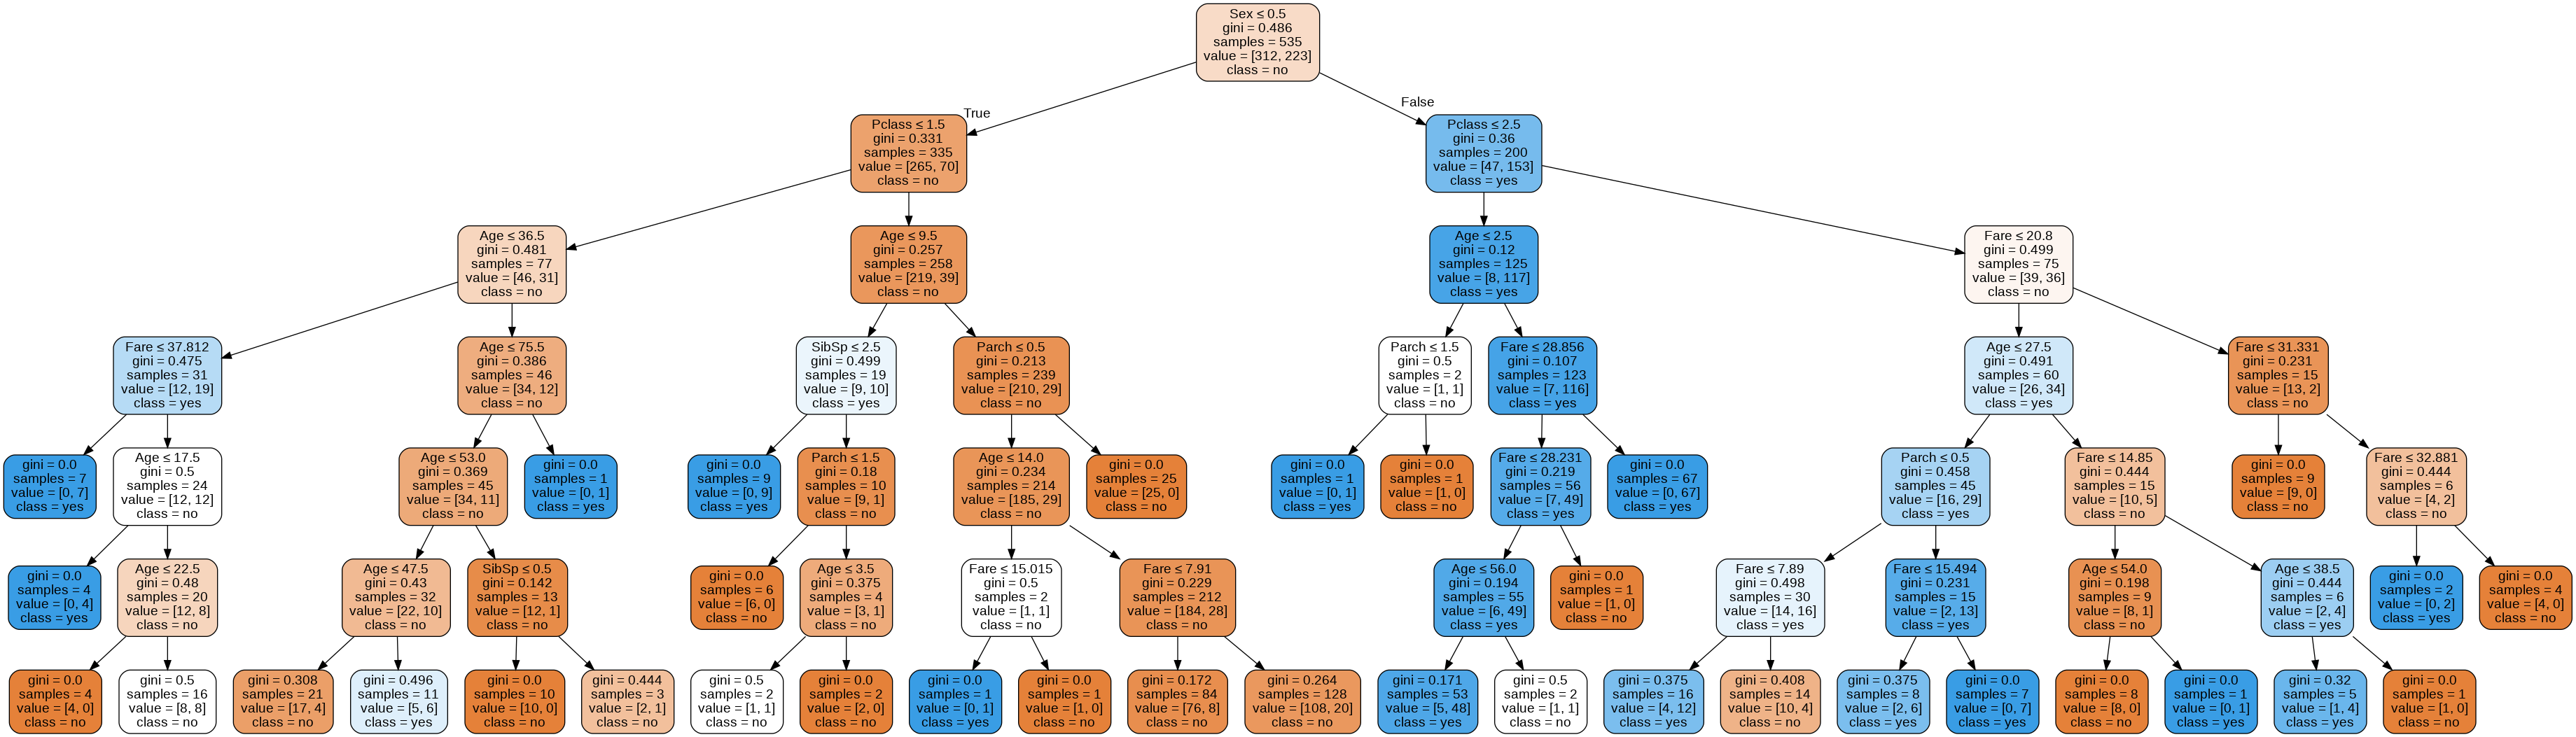

In [202]:
target_names = np.unique(y.map({0:'no', 1:'yes'}))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = list(x.columns),class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Train_test_tree.png')
Image(graph.create_png())

Novo teste

In [203]:
tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 1,splitter='best', max_depth=4)
tree.fit(x_train, y_train)
predicted = tree.predict(x_test)
val = accuracy_score(y_test, predicted)

In [204]:
target_names = np.unique(y)
columns = df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

In [205]:
predicted = tree.predict(x_test)
accuracy_score(y_test, predicted)

0.8491620111731844

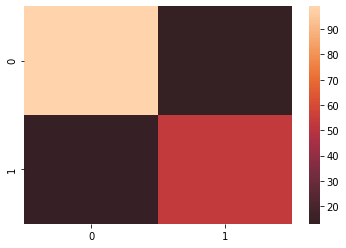

In [206]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [207]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

Predicted Not Survival  Predicted Survival
True Not Survival                      99                  13
True Survival                          14                  53

In [208]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.80      0.79      0.80        67

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [209]:
val

0.8491620111731844

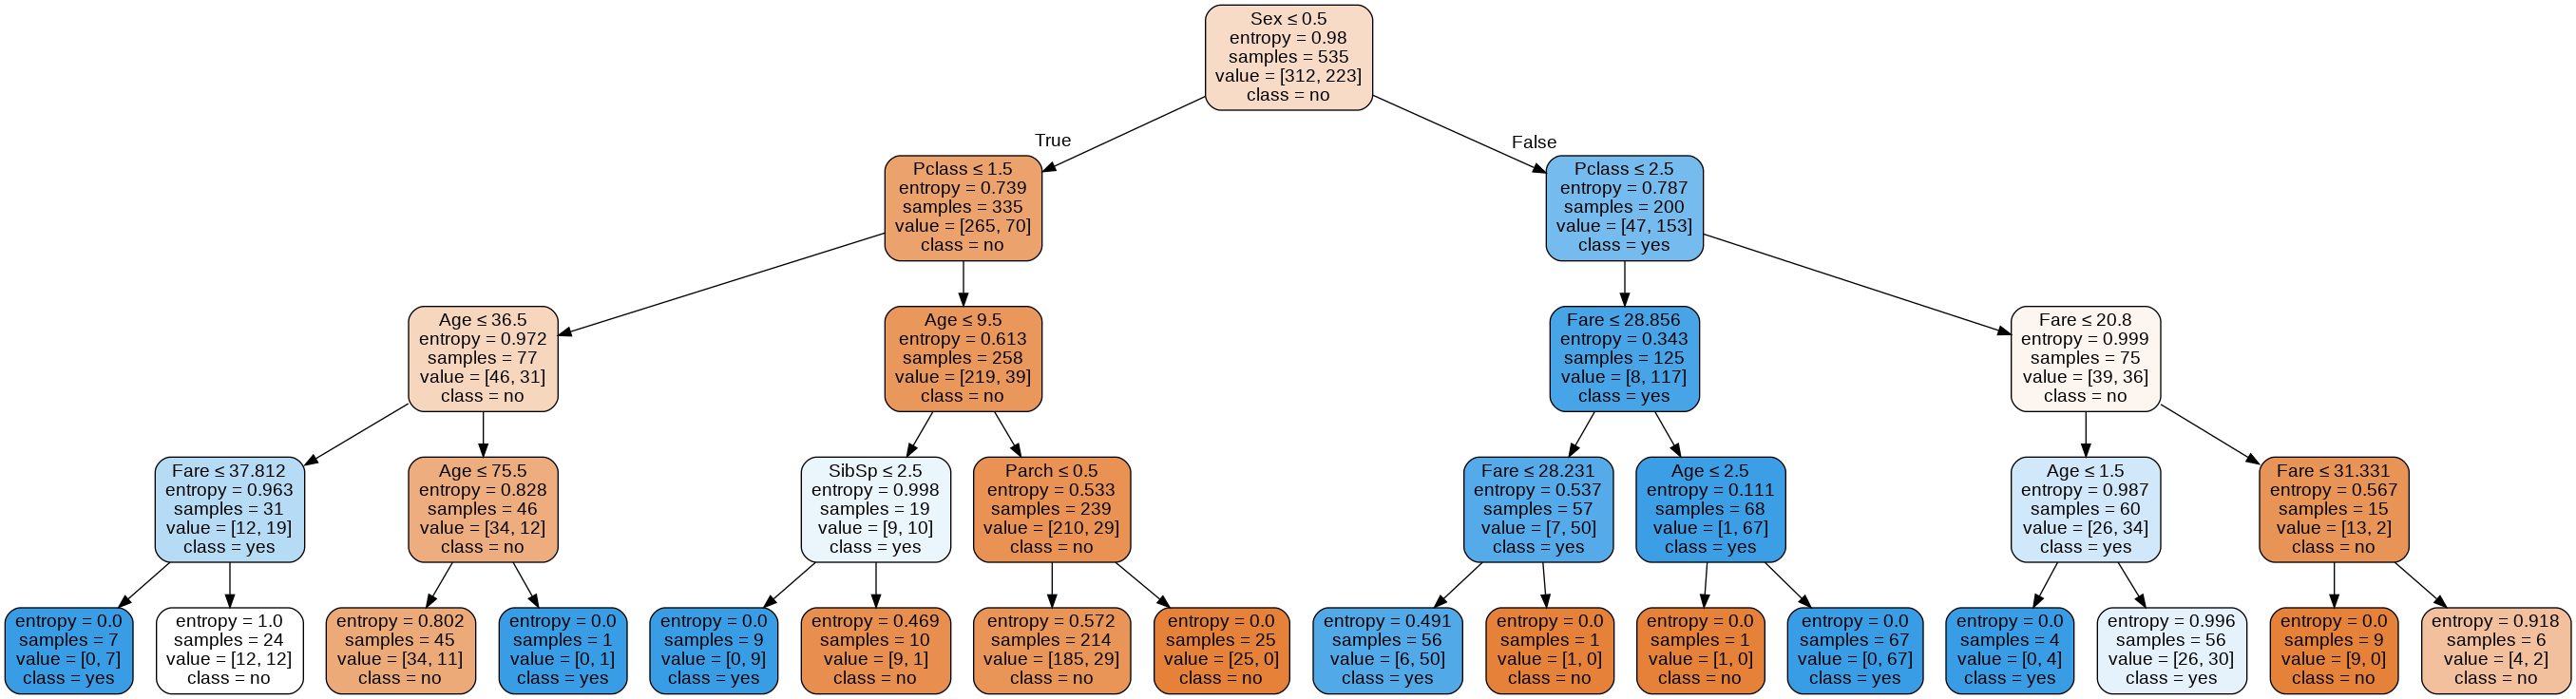

In [210]:
target_names = np.unique(y.map({0:'no', 1:'yes'}))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = list(x.columns),class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Train_test_tree.png')
Image(graph.create_png())

In [211]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [212]:
df = df[['Pclass','Sex','Age','Fare', 'Survived']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df = df.dropna()

x = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [213]:
tree = DecisionTreeClassifier(random_state = 1,splitter='best', max_depth=6)
tree.fit(x_train, y_train)
predicted = tree.predict(x_test)
val = accuracy_score(y_test, predicted)

In [214]:
val

0.8715083798882681

In [215]:
target_names = np.unique(y)
columns = df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

In [216]:
predicted = tree.predict(x_test)
accuracy_score(y_test, predicted)

0.8715083798882681

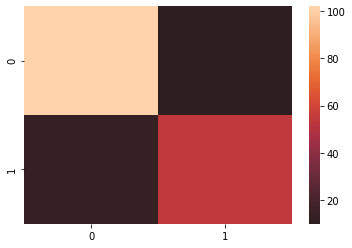

In [217]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [218]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

Predicted Not Survival  Predicted Survival
True Not Survival                     102                  10
True Survival                          13                  54

In [219]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       112
           1       0.84      0.81      0.82        67

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



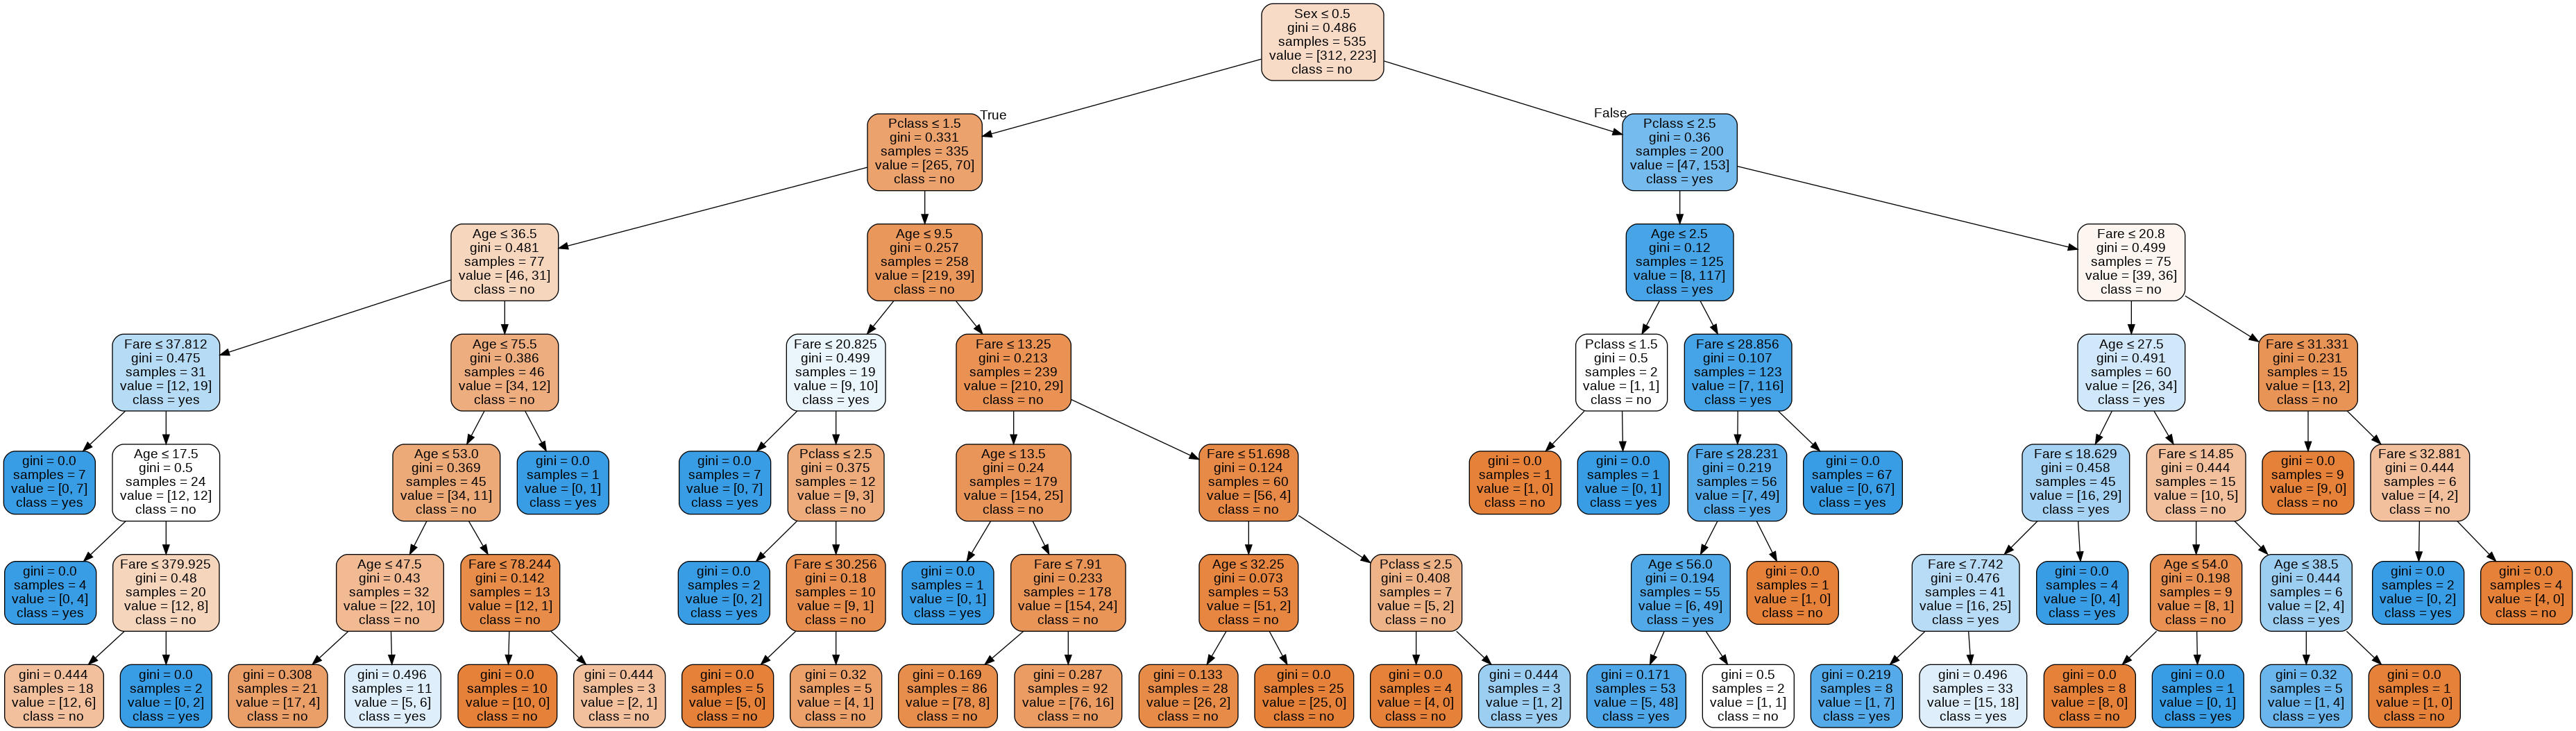

In [220]:
target_names = np.unique(y.map({0:'no', 1:'yes'}))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = list(x.columns),class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Train_test_tree.png')
Image(graph.create_png())